# Monitoring de la VFC

1.	Évolution de la FC (fréquence cardiaque) :
- Comparez la moyenne de la fréquence cardiaque pour chaque jour/semaine.
- Représentez cela dans un graphique (évolution journalière ou hebdomadaire).

2.	Analyses temporelles et spectrales :
- Temporelles : Moyenne RR, SDNN (écart-type des intervalles RR), RMSSD.
- Spectrales : Low Frequency (LF), High Frequency (HF), ratio LF/HF, Welch, FFT


# I) Représentation graphique des paramètres les plus pertinents pour l'analyse temporelle de la variabilité de la fréquence cardiaque (VFC). 

Les enregistrement ont été fait en position allongé.

La variabilité de la Fréquence cardiaque est due au mode de contrôle du rythme cardiaque, influencée et modifiée par un système hormonal et par le système nerveux végétatif. Ainsi la fréquence cardiaque est la résultante de deux composantes : une activité sympathique cardioaccélératrice d’une part, et une activité parasympathique cardiodécélératrice, d’autre part. Ces deux composantes sont antagonistes et fonctionnent simultanément. 

Stress = système nerveux sympathique joue sur l'activité cardiaque = augmente la fréquence cardiaque 
No stress/Relaxation = Système nerveux parasympathique = baisse de la fréquence cardiaque. 

In [1]:
import pandas as pd

# Importer les données
file_path = "C:\\Users\\user\\OneDrive\\Documents\\M2 SNS IDS\\HAH913E - Santé activité physique 5\\Physiologie\\Py_Data_HRV - Data.csv"
hrv_data = pd.read_csv(file_path)

# Afficher la strucutres 
hrv_data.head()


,Date,28/10/2024,29/10/2024,30/10/2024,31/10/2024,01/11/2024,02/11/2024,03/11/2024,04/11/2024,5/11/2024,...,15/11/2024,16/11/2024,17/11/2024,18/11/2024,19/11/2024,20/11/2024,21/11/2024,22/11/2024,23/11/2024,24/11/2024
0,Mean RR* (ms),978.0,900.00,921.00,942.00,945.00,812.00,875.00,987.00,964.00,...,962.00,890.00,1034.00,1144.00,956.00,1114.0,990.00,1091.00,1106.00,997.00
1,Mean HR* (bpm),61.0,67.00,65.00,64.00,64.00,74.00,69.00,61.00,62.00,...,62.00,67.00,58.00,52.00,63.00,54.0,61.00,55.00,54.00,60.00
2,SDNN (ms),182.5,167.10,192.60,212.20,214.60,148.70,184.50,228.10,692.60,...,283.00,178.20,233.00,251.10,158.50,137.8,198.90,153.80,163.80,166.60
3,RMSSD (ms),226.8,187.10,220.70,240.00,244.30,170.80,215.00,278.80,996.00,...,382.30,230.80,325.90,383.60,222.00,189.3,254.60,201.00,237.10,216.90
4,pNN50 (%),64.0,61.76,65.24,66.04,66.25,39.25,57.06,73.03,87.82,...,71.79,64.29,69.44,71.54,67.74,64.0,70.67,60.29,82.84,79.19


In [2]:
hrv_data.columns

Index(['Date ', '28/10/2024', '29/10/2024', '30/10/2024', '31/10/2024',
       '01/11/2024', '02/11/2024', '03/11/2024', '04/11/2024', '5/11/2024',
       '06/11/2024', '07/11/2024', '08/11/2024', '09/11/2024', '10/11/2024',
       '11/11/2024', '12/11/2024', '13/11/2024', '14/11/2024', '15/11/2024',
       '16/11/2024', '17/11/2024', '18/11/2024', '19/11/2024', '20/11/2024',
       '21/11/2024', '22/11/2024', '23/11/2024', '24/11/2024'],
      dtype='object')

In [3]:
import matplotlib.pyplot as plt

# Nettoyer les noms de colonnes pour supprimer les espaces au début ou à la fin.
hrv_data.columns = hrv_data.columns.str.strip()

# Vérifier si la colone date existe la renomer métric si c'est le cas 
if 'Date' in hrv_data.columns:
    hrv_data = hrv_data.rename(columns={"Date": "Metric"}).set_index("Metric").T
else:
    # Handle cases where 'Date' might not be the column name
    print("La colonne 'Date' n'est pas trouvée. Assurez-vous que le fichier contient une colonne pour les métriques.")

# Convertir l'index en format datetime
try:
    hrv_data.index = pd.to_datetime(hrv_data.index, format='%d/%m/%Y', errors='coerce')
except Exception as e:
    print("Erreur lors de la conversion des dates :", e)

# Convertir les datas en données numéris pour les tracés 
hrv_data = hrv_data.apply(pd.to_numeric, errors='coerce')

# Vérifier la structure finale des données
print(hrv_data.head())


Metric      Mean RR* (ms)  Mean HR* (bpm)  SDNN (ms)  RMSSD (ms)  pNN50 (%)  \
2024-10-28          978.0            61.0      182.5       226.8      64.00   
2024-10-29          900.0            67.0      167.1       187.1      61.76   
2024-10-30          921.0            65.0      192.6       220.7      65.24   
2024-10-31          942.0            64.0      212.2       240.0      66.04   
2024-11-01          945.0            64.0      214.6       244.3      66.25   

Metric      Stress index  
2024-10-28           2.6  
2024-10-29           4.2  
2024-10-30           3.6  
2024-10-31           2.9  
2024-11-01           2.8  


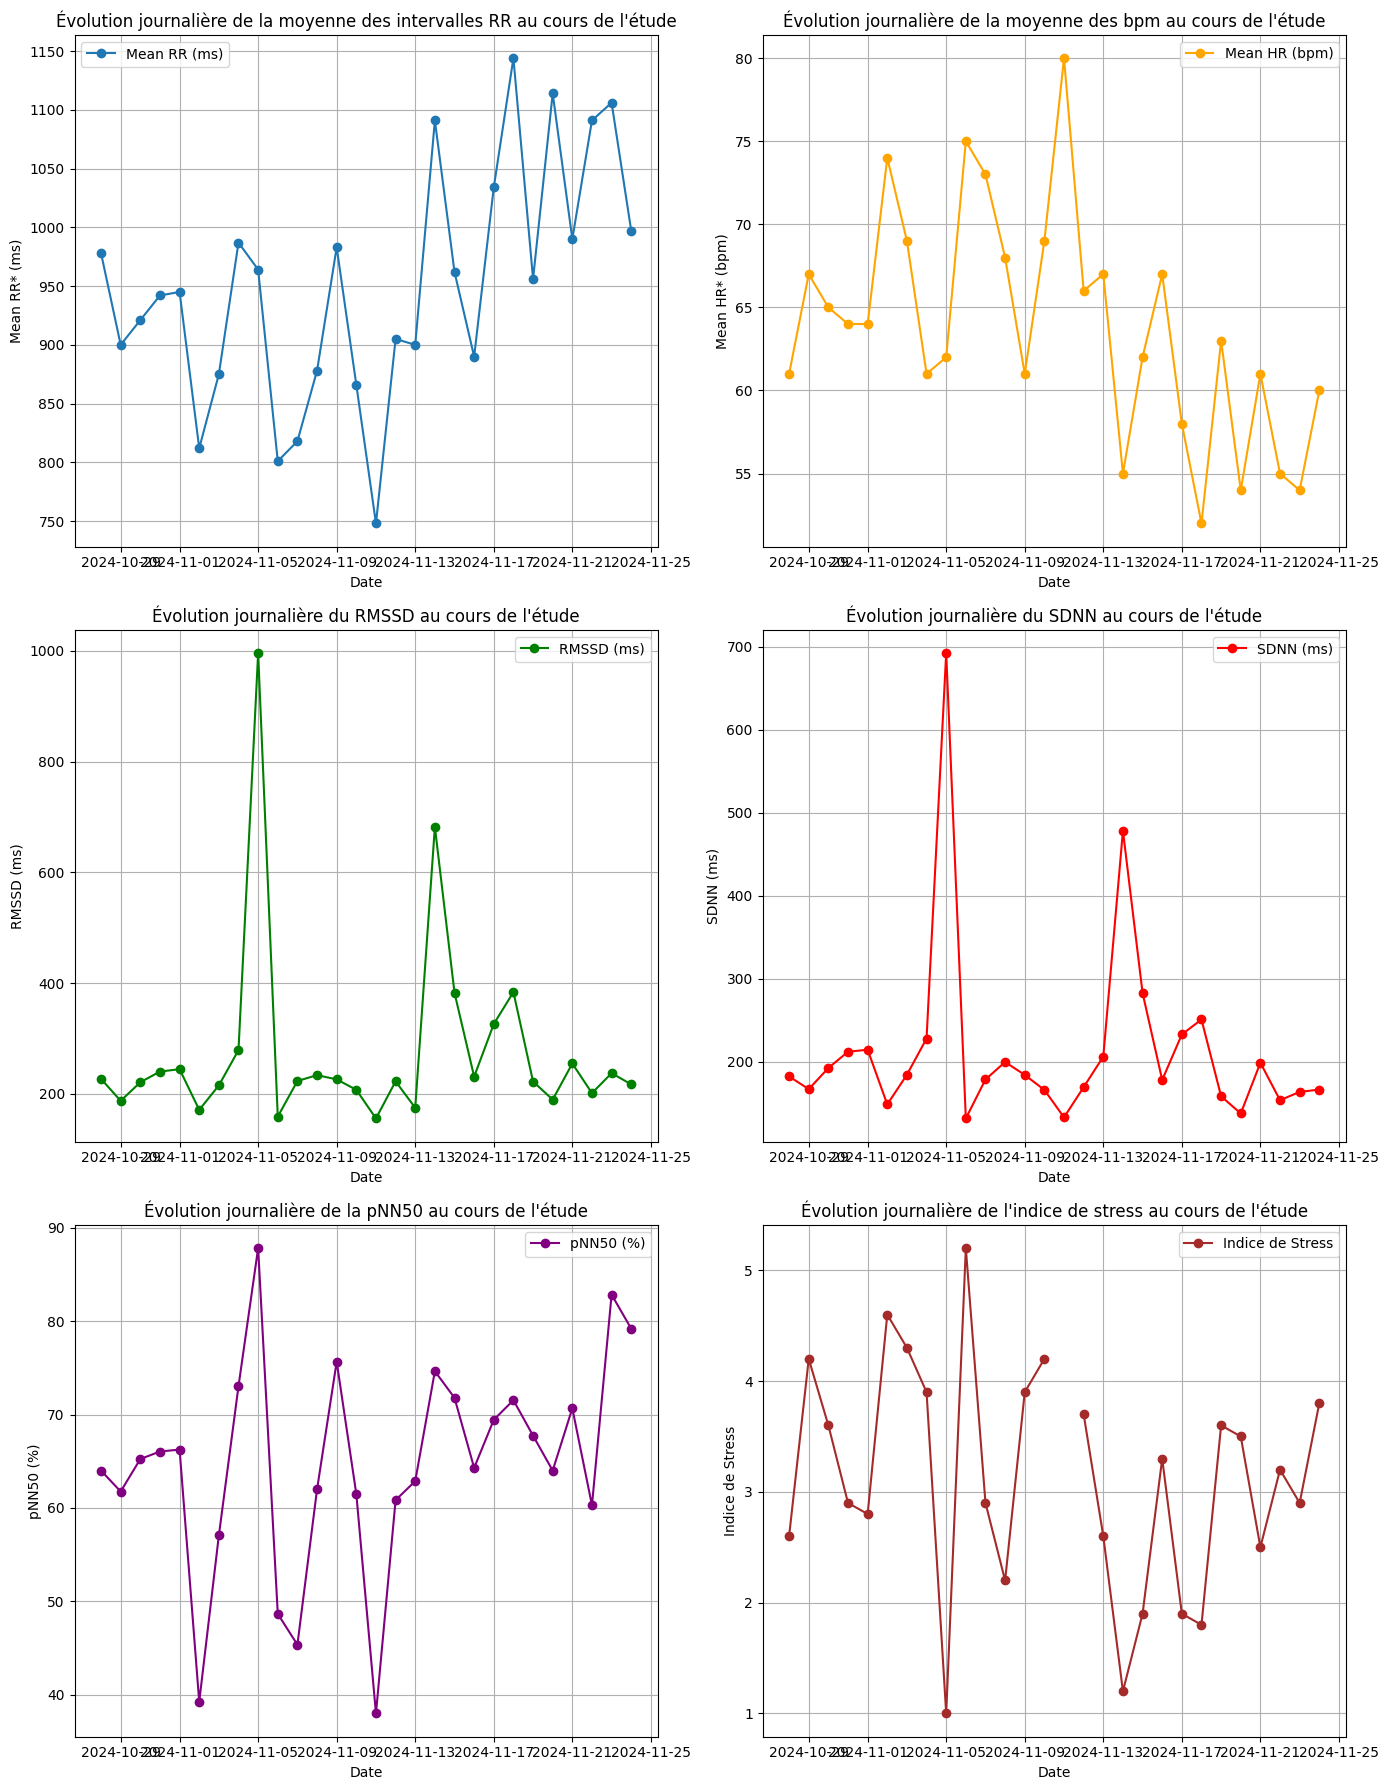

In [4]:
# Extraire les données du tableau
mean_rr = hrv_data['Mean RR* (ms)']
mean_hr = hrv_data['Mean HR* (bpm)']
rmssd = hrv_data['RMSSD (ms)']
sdnn = hrv_data['SDNN (ms)']
pnn50 = hrv_data['pNN50 (%)']
stress_index = hrv_data['Stress index']

# Adapter la visualisation 

fig, axes = plt.subplots(3, 2, figsize=(14, 18))

# Mean RR (ms)
axes[0, 0].plot(mean_rr, label='Mean RR (ms)', marker='o')
axes[0, 0].set_title("Évolution journalière de la moyenne des intervalles RR au cours de l'étude")
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Mean RR* (ms)')
axes[0, 0].grid()
axes[0, 0].legend()

# Mean HR (bpm)
axes[0, 1].plot(mean_hr, label='Mean HR (bpm)', marker='o', color='orange')
axes[0, 1].set_title("Évolution journalière de la moyenne des bpm au cours de l'étude")
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Mean HR* (bpm)')
axes[0, 1].grid()
axes[0, 1].legend()

# RMSSD (ms)
axes[1, 0].plot(rmssd, label='RMSSD (ms)', marker='o', color='green')
axes[1, 0].set_title("Évolution journalière du RMSSD au cours de l'étude")
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('RMSSD (ms)')
axes[1, 0].grid()
axes[1, 0].legend()

# SDNN (ms)
axes[1, 1].plot(sdnn, label='SDNN (ms)', marker='o', color='red')
axes[1, 1].set_title("Évolution journalière du SDNN au cours de l'étude")
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('SDNN (ms)')
axes[1, 1].grid()
axes[1, 1].legend()

# pNN50 (%)
axes[2, 0].plot(pnn50, label='pNN50 (%)', marker='o', color='purple')
axes[2, 0].set_title("Évolution journalière de la pNN50 au cours de l'étude")
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('pNN50 (%)')
axes[2, 0].grid()
axes[2, 0].legend()

# Stress Index
axes[2, 1].plot(stress_index, label='Indice de Stress', marker='o', color='brown')
axes[2, 1].set_title("Évolution journalière de l'indice de stress au cours de l'étude")
axes[2, 1].set_xlabel('Date')
axes[2, 1].set_ylabel('Indice de Stress')
axes[2, 1].grid()
axes[2, 1].legend()


# Final adjustments
plt.tight_layout()
plt.show()


### **1. Évolution journalière de la moyenne des intervalles RR (Mean RR)**

Ce Graphique représente les variations de la durée moyennes des intervalles RR en ms = intervalles entres les battements cardiaques/  temps entre 2 complexes QRS. 

- La fréquence cardiaque est plus lente =  durée des intervalles RR augmentent. 
- La Fréquence cardiaque est plus rapide = durée des intervalles RR diminuent. 

Une variabilité cohérente et modérée peut indiquer un bon équilibre entre les systèmes nerveux sympathique et parasympathique.


### **2. Évolution de la moyenne des bpm (Mean HR)**

Ce graphique représente la fréquence cardiaque moyenne journalière (en battements par minute, bpm) .

- Baisse de la fréquence Cardiaque = Amélioration de la condition physique 
- Augmentation soudaine ou prolonger de la fréquence cardiaque = Stress/ Fatigue/ charge physique importante  

### **3. Évolution du RMSSD**

Ce graphique représente les variations à court terme dans les intervalles RR. Ceci est caractéristique du système nerveux autonome. 

- Valeurs élevées = bon niveau de récupération et peu de stress. 
- Valeurs Basses = Stress/ fatigue chronique. 

### **4. Évolution du SDNN**

Ce graphique représente la mesure globale de la variabilité de la fréquence cardiaque, prennant en compte l'ensemble des intervalles RR. 

- Valeurs élevées = Bonne capacité d'adaptation/ équilibre autonome sain.
- Valeurs faibles = Stress important / Condition physique réduite.

### **5. Évolution de la pNN50**

Ce graphique représente le pourcentage d'intervalles RR concécutifs ayant une différence de plusd e 50ms. Ceci est caractéristique de l'activité parasympathique. 

- Valeurs élevées = Bonne régulation autonome/ état Relaxé
- Valeurs faibles = Stress accru/ Mauvaise récupération.

### **6. Indice de Stress**

Ce graphique représente l'évaluation du niveau de stress basé sur les caractéristiques des intervalles RR. 

- Indice faible =  Relaxation/ Récupération.
- Indice élevé = Signe Stress mental ou physique accru. Haute activité cardiaque sympathique.    

# II) Statistiques descriptives 

In [5]:
# Calculer la moyenne et l'écart type pour chaque métrique
summary_stats = hrv_data.describe().loc[['mean', 'std']].T
summary_stats.rename(columns={'mean': 'Moyenne', 'std': 'Écart type'}, inplace=True)

# Afficher le tableau sous forme de texte
print("Résumé des statistiques des données HRV :\n")
print(summary_stats)



Résumé des statistiques des données HRV :

                   Moyenne  Écart type
Metric                                
Mean RR* (ms)   949.928571  100.370768
Mean HR* (bpm)   63.821429    6.826167
SDNN (ms)       214.142857  114.380306
RMSSD (ms)      275.189286  173.868252
pNN50 (%)        64.705357   11.620825
Stress index      3.118519    1.034422


# III) Analyse spectrale 

In [24]:
data_path = '/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/projet PY/Github py /VFC-Analysis/data/data4semaines.csv'  # Remplacez par votre chemin
data = pd.read_csv(data_path, delimiter=';')

# Afficher la strucutres 
data.head()

# Inspecter les colonnes et les premières lignes de données
print(data.head())
print(data.columns)



    0             1             2             3             4             5  \
0 NaN       RR Data                FFT spectrum                 AR Spectrum   
1 NaN          Time   RR interval     Frequency           PSD     Frequency   
2 NaN           (s)           (s)          (Hz)     (ms^2/Hz)          (Hz)   
3 NaN         0.976         0.976         0.000        0.3730         0.000   
4 NaN         2.307         1.331         0.003        0.6392         0.003   

              6             7             8             9  10        Date  
0                                                         NaN         NaN  
1           PSD     VLF comp.      LF comp.      HF comp. NaN         NaN  
2     (ms^2/Hz)     (ms^2/Hz)     (ms^2/Hz)     (ms^2/Hz) NaN         NaN  
3     5115.9497                                           NaN  2024-10-28  
4    10251.4397                                           NaN  2024-10-28  
Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'Date'

In [63]:
import pandas as pd
import numpy as np
from scipy.signal import welch
import matplotlib.pyplot as plt

# Charger les données
file_path = '/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/projet PY/Github py /VFC-Analysis/data/data4semainesfinal.csv'
hrv_data = pd.read_csv(file_path, delimiter=';')

# Nettoyage et renommer les colonnes
hrv_data.columns = hrv_data.columns.str.strip()
hrv_data = hrv_data.rename(columns={
    'Time   (s)': 'Time (s)',
    'RR interval   (s)': 'RR interval (s)',
    'Fréquence  (Hz)': 'Frequency (Hz)',
    'PSD (ms^2/Hz)': 'PSD',
    'AR SPECTRUM  Fréquence   (Hz)': 'AR Frequency (Hz)',
    'AR SPECTRUM PSD (ms^2/Hz)': 'AR PSD (ms^2/Hz)',
    'Date': 'Date'
})

# Convertir la colonne 'Date' en type datetime
hrv_data['Date'] = pd.to_datetime(hrv_data['Date'])

# Convertir les intervalles RR en type numérique
hrv_data['RR interval (s)'] = pd.to_numeric(hrv_data['RR interval (s)'], errors='coerce')

# Définir les périodes
periods = {
    'No Sport & Junk Food': (pd.Timestamp('2024-10-28'), pd.Timestamp('2024-11-03')),
    'Sport & Healthy Diet': (pd.Timestamp('2024-11-04'), pd.Timestamp('2024-11-18')),
    'No Sport & No Junk Food': (pd.Timestamp('2024-11-19'), pd.Timestamp('2024-11-24'))
}

# Fonction pour effectuer l'analyse spectrale
def spectral_analysis(rr_intervals, fs=4):
    """Perform spectral analysis on RR intervals."""
    # Interpolation pour échantillonnage uniforme
    time = np.linspace(0, len(rr_intervals) - 1, len(rr_intervals))
    interpolated_rr = np.interp(np.arange(0, len(rr_intervals), 1/fs), time, rr_intervals)

    # Calcul du spectre de puissance (méthode de Welch)
    frequencies, power = welch(interpolated_rr, fs=fs, nperseg=256)

    # Définir les bandes LF et HF
    lf_band = (frequencies >= 0.04) & (frequencies < 0.15)
    hf_band = (frequencies >= 0.15) & (frequencies <= 0.4)

    # Calculer les puissances dans chaque bande
    lf_power = np.trapz(power[lf_band], frequencies[lf_band])
    hf_power = np.trapz(power[hf_band], frequencies[hf_band])
    lf_hf_ratio = lf_power / hf_power if hf_power > 0 else np.nan

    return lf_power, hf_power, lf_hf_ratio

# Analyse spectrale pour chaque période
results = []
for period_name, (start_date, end_date) in periods.items():
    # Filtrer les données pour la période
    period_data = hrv_data[(hrv_data['Date'] >= start_date) & (hrv_data['Date'] <= end_date)]

    # Extraire les intervalles RR
    rr_intervals = period_data['RR interval (s)'].dropna().values

    if len(rr_intervals) > 0:
        # Effectuer l'analyse spectrale
        lf_power, hf_power, lf_hf_ratio = spectral_analysis(rr_intervals)
    else:
        lf_power, hf_power, lf_hf_ratio = np.nan, np.nan, np.nan

    # Sauvegarder les résultats
    results.append({
        'Period': period_name,
        'LF Power': lf_power,
        'HF Power': hf_power,
        'LF/HF Ratio': lf_hf_ratio
    })

# Convertir les résultats en DataFrame
spectral_results = pd.DataFrame(results)

# Afficher les résultats
print(spectral_results)




                    Period  LF Power  HF Power  LF/HF Ratio
0     No Sport & Junk Food  0.014698  0.008232     1.785413
1     Sport & Healthy Diet  0.019841  0.025240     0.786109
2  No Sport & No Junk Food  0.006279  0.010343     0.607117


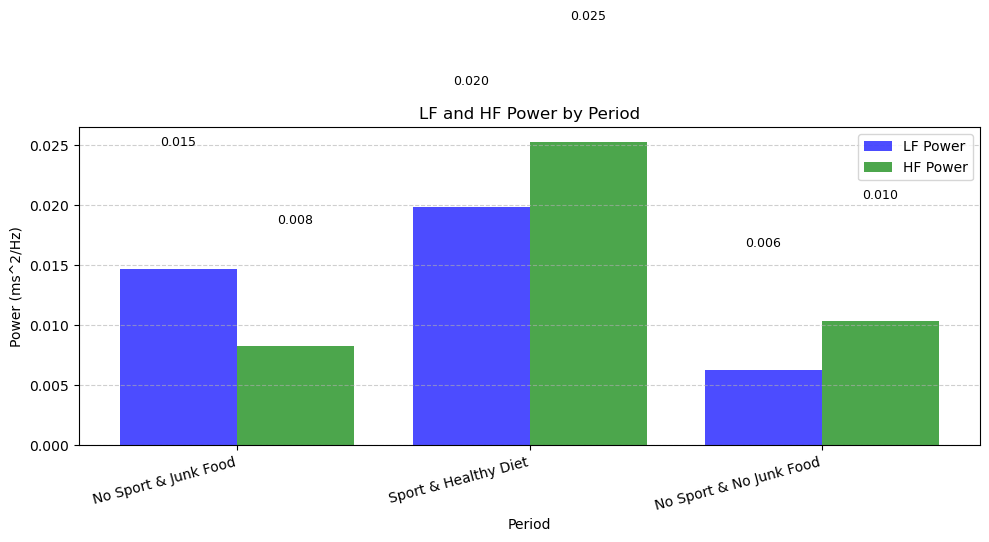

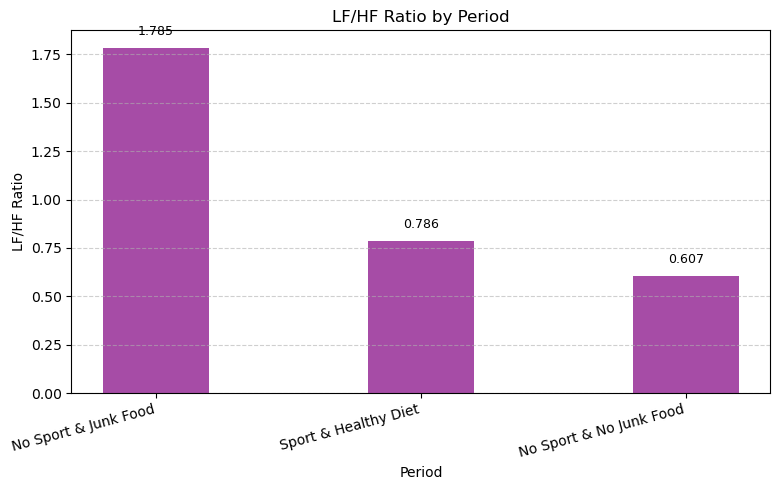

In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Visualiser les puissances LF et HF côte à côte
plt.figure(figsize=(10, 6))

# Création des barres côte à côte pour LF et HF Power
bar_width = 0.4
x = np.arange(len(spectral_results['Period']))

# Barres pour LF Power
plt.bar(x - bar_width / 2, spectral_results['LF Power'], label='LF Power', alpha=0.7, color='blue', width=bar_width)

# Barres pour HF Power
plt.bar(x + bar_width / 2, spectral_results['HF Power'], label='HF Power', alpha=0.7, color='green', width=bar_width)

# Ajout des valeurs au sommet des barres
for i, (lf, hf) in enumerate(zip(spectral_results['LF Power'], spectral_results['HF Power'])):
    plt.text(i - bar_width / 2, lf + 0.01, f'{lf:.3f}', ha='center', va='bottom', fontsize=9)
    plt.text(i + bar_width / 2, hf + 0.01, f'{hf:.3f}', ha='center', va='bottom', fontsize=9)

# Réglages supplémentaires
plt.xticks(x, spectral_results['Period'], rotation=15, ha='right')
plt.title("LF and HF Power by Period")
plt.ylabel("Power (ms^2/Hz)")
plt.xlabel("Period")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Visualiser le ratio LF/HF sur un graphique séparé
plt.figure(figsize=(8, 5))

# Barres pour le ratio LF/HF
plt.bar(x, spectral_results['LF/HF Ratio'], color='purple', alpha=0.7, width=bar_width)

# Ajout des valeurs au sommet des barres
for i, ratio in enumerate(spectral_results['LF/HF Ratio']):
    plt.text(i, ratio + 0.05, f'{ratio:.3f}', ha='center', va='bottom', fontsize=9)

# Réglages supplémentaires
plt.xticks(x, spectral_results['Period'], rotation=15, ha='right')
plt.title("LF/HF Ratio by Period")
plt.ylabel("LF/HF Ratio")
plt.xlabel("Period")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [43]:
hrv_data.head()

,Unnamed: 0,Time (s),RR interval (s),Frequency (Hz),PSD,AR Frequency (Hz),AR PSD (ms^2/Hz),Date
0,NaN,0.976,0.976,0.000,0.3730,0.000,5115.9497,2024-10-28
1,NaN,2.307,1.331,0.003,0.6392,0.003,10251.4397,2024-10-28
2,NaN,3.472,1.165,0.007,0.4548,0.007,10310.3423,2024-10-28
3,NaN,4.647,1.175,0.010,33.8769,0.010,10409.4606,2024-10-28
4,NaN,5.790,1.143,0.013,236.7866,0.013,10550.2446,2024-10-28


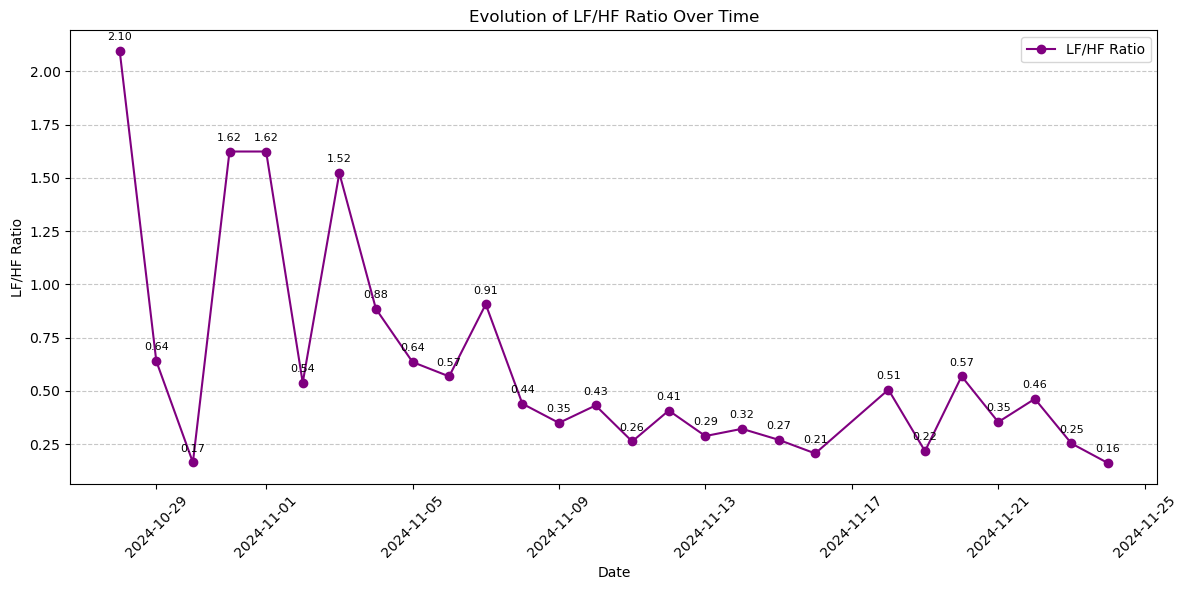

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
file_path = '/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/projet PY/Github py /VFC-Analysis/data/data4semainesfinal.csv'
data = pd.read_csv(file_path, delimiter=';')

# Nettoyer les noms des colonnes
data.columns = [
    "Index", "Time (s)", "RR interval (s)", "Frequency (Hz)", 
    "PSD (ms^2/Hz)", "AR Spectrum Frequency (Hz)", "AR Spectrum PSD (ms^2/Hz)", "Date"
]

# Convertir 'Date' en format datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Convertir les colonnes numériques
data['Frequency (Hz)'] = pd.to_numeric(data['Frequency (Hz)'], errors='coerce')
data['PSD (ms^2/Hz)'] = pd.to_numeric(data['PSD (ms^2/Hz)'], errors='coerce')

# Définir les bandes de fréquences LF et HF
lf_band = (0.04, 0.15)  # Bande LF (en Hz)
hf_band = (0.15, 0.4)   # Bande HF (en Hz)

# Fonction pour calculer les puissances LF et HF par jour
def calculate_lf_hf_ratios(group):
    lf_power = group.loc[(group['Frequency (Hz)'] >= lf_band[0]) & (group['Frequency (Hz)'] < lf_band[1]), 'PSD (ms^2/Hz)'].sum()
    hf_power = group.loc[(group['Frequency (Hz)'] >= hf_band[0]) & (group['Frequency (Hz)'] < hf_band[1]), 'PSD (ms^2/Hz)'].sum()
    lf_hf_ratio = lf_power / hf_power if hf_power > 0 else None
    return pd.Series({'LF Power': lf_power, 'HF Power': hf_power, 'LF/HF Ratio': lf_hf_ratio})

# Appliquer le calcul à chaque jour
daily_ratios = data.groupby('Date').apply(calculate_lf_hf_ratios).reset_index()

# Tracer l'évolution du ratio LF/HF au cours du temps
plt.figure(figsize=(12, 6))
plt.plot(daily_ratios['Date'], daily_ratios['LF/HF Ratio'], marker='o', linestyle='-', color='purple', label='LF/HF Ratio')

# Ajouter des annotations des points
for date, ratio in zip(daily_ratios['Date'], daily_ratios['LF/HF Ratio']):
    plt.text(date, ratio + 0.05, f'{ratio:.2f}', ha='center', fontsize=8)

# Ajustements finaux
plt.title("Evolution of LF/HF Ratio Over Time")
plt.xlabel("Date")
plt.ylabel("LF/HF Ratio")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()
plt.show()


In [90]:
# Définir les périodes
periods = {
    "Junk Food (28/10/2024 - 03/11/2024)": ('2024-10-28', '2024-11-03'),
    "Sport & Healthy Diet (04/11/2024 - 18/11/2024)": ('2024-11-04', '2024-11-18'),
    "No Sport & No Junk Food (19/11/2024 - 24/11/2024)": ('2024-11-19', '2024-11-24')
}

# Calculer les moyennes pour chaque période
period_averages = {}
for period_name, (start_date, end_date) in periods.items():
    period_data = daily_ratios[(daily_ratios['Date'] >= start_date) & (daily_ratios['Date'] <= end_date)]
    period_averages[period_name] = period_data['LF/HF Ratio'].mean()

# Créer un DataFrame pour afficher les résultats
average_ratios = pd.DataFrame(list(period_averages.items()), columns=['Period', 'Average LF/HF Ratio'])

# Afficher le tableau des moyennes directement avec pandas
print("Average LF/HF Ratios by Period")
print(average_ratios)


Average LF/HF Ratios by Period
                                              Period  Average LF/HF Ratio
0                Junk Food (28/10/2024 - 03/11/2024)             1.172587
1     Sport & Healthy Diet (04/11/2024 - 18/11/2024)             0.463185
2  No Sport & No Junk Food (19/11/2024 - 24/11/2024)             0.336536


## FTT pour chaque période 


In [69]:
for period_name, (start_date, end_date) in periods.items():
    period_data = hrv_data[(hrv_data['Date'] >= start_date) & (hrv_data['Date'] <= end_date)]
    rr_intervals = period_data['RR interval (s)'].dropna().values
    print(f"{period_name}: {len(rr_intervals)} RR intervals")


Junk Food: 1107 RR intervals
Sport & Healthy Diet: 2314 RR intervals
No Sport & No Junk Food: 863 RR intervals


In [70]:
fft_frequencies, fft_values = compute_fft(rr_intervals)
print(f"FFT Frequencies (first 10): {fft_frequencies[:10]}")
print(f"FFT Values (first 10): {fft_values[:10]}")


FFT Frequencies (first 10): [0.         0.0011587  0.00231741 0.00347611 0.00463482 0.00579352
 0.00695223 0.00811093 0.00926964 0.01042834]
FFT Values (first 10): [26714.8764891    670.21648625   927.44096284   422.40780655
   324.22604596   531.93565482  1363.46395314   164.11231388
   108.68933159   275.53669043]


Junk Food: 1107 RR intervals
Sport & Healthy Diet: 2314 RR intervals
No Sport & No Junk Food: 863 RR intervals


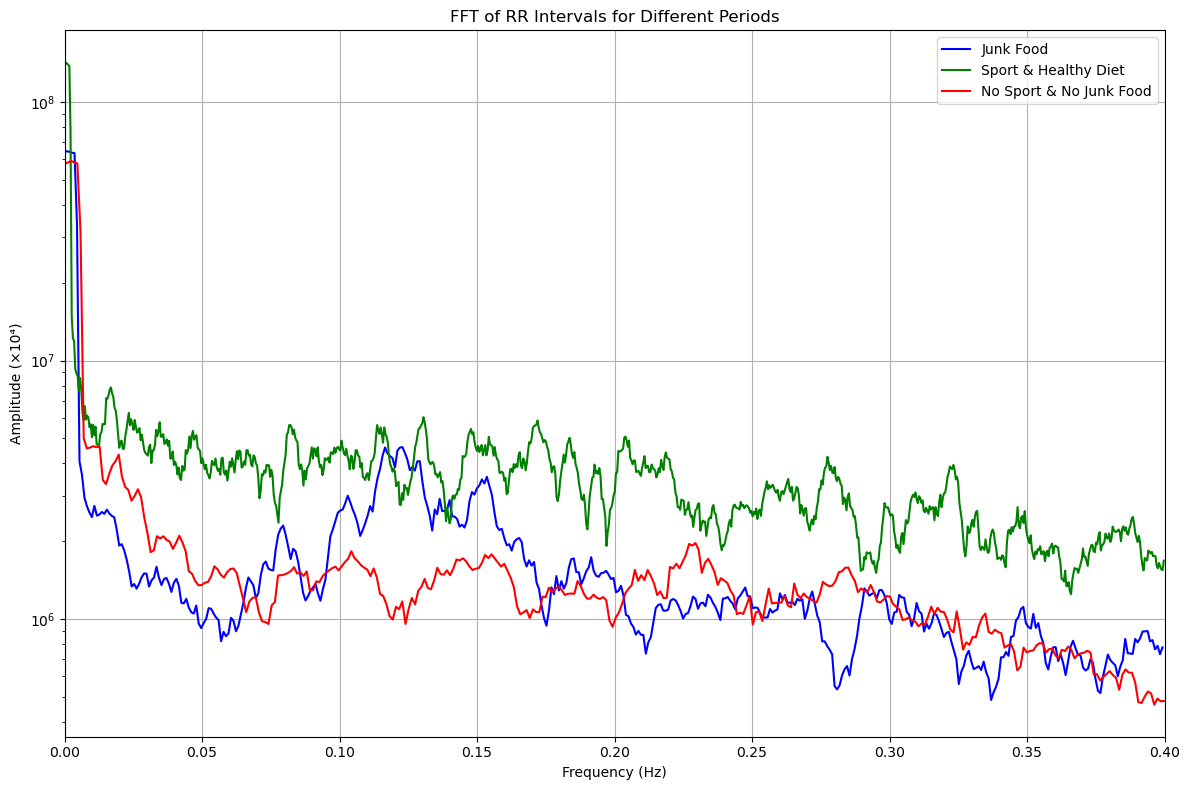

In [73]:
plt.figure(figsize=(12, 8))

for i, (period_name, (start_date, end_date)) in enumerate(periods.items()):
    # Filtrer les données pour la période
    period_data = hrv_data[(hrv_data['Date'] >= start_date) & (hrv_data['Date'] <= end_date)]
    rr_intervals = period_data['RR interval (s)'].dropna().values
    
    print(f"{period_name}: {len(rr_intervals)} RR intervals")
    if len(rr_intervals) > 0:
        # Calculer la FFT
        fft_frequencies, fft_values = compute_fft(rr_intervals)
        
        # Limiter à 0.4 Hz (bande HF)
        mask = fft_frequencies <= 0.4
        fft_frequencies = fft_frequencies[mask]
        fft_values = fft_values[mask]
        
        # Amplifier les amplitudes FFT pour meilleure visibilité
        fft_values = fft_values * 10000  # Amplifier
        
        # Lissage optionnel
        from scipy.ndimage import uniform_filter1d
        fft_values = uniform_filter1d(fft_values, size=10)
        
        # Traçage
        plt.plot(fft_frequencies, fft_values, label=period_name, color=colors[i])
    else:
        print(f"No RR data for {period_name}")

# Ajustements finaux
plt.title("FFT of RR Intervals for Different Periods")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (×10⁴)")
plt.xlim(0, 0.4)  # Se concentrer sur la bande HF
plt.yscale('log')  # Échelle logarithmique
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
